## Statistical analysis: Trial-to-trial variability

In [2]:
library(lme4)
library(MuMIn)
library(lmerTest)
library(car)
library(performance)
#https://stat.ethz.ch/~meier/teaching/anova/random-and-mixed-effects-models.html#mixed-effects-models

In [3]:
library(effectsize)

Warning message:
"package 'effectsize' was built under R version 4.0.5"


In [23]:
# get the current working directory
current_dir <- getwd()
# navigate to the parent directory
parent_dir <- dirname(current_dir)
# read data
results <- read.csv(file.path(parent_dir, 'results', '3_results_ica_alignment.csv'))
results$Group[results$Group == 1] <- 'Patients'
results$Group[results$Group == 2] <- 'Controls'
results$Condition[results$Condition == 4] <- 'Vernier'
results$Condition[results$Condition == 1] <- 'LSOA'
results$Condition[results$Condition == 2] <- 'SSOA'
results$Condition[results$Condition == 3] <- 'Mask'
# here we go from negative to positive values to represent amplitudes
results$MinNonAl <- results$MinNonAl * -1
results$MinAl <- results$MinAl * -1
results$Gender <-factor(results$Gender)
results$Group <-factor(results$Group)
results$ID <-factor(results$ID)
results$Condition <-factor(results$Condition)
results$Condition <- relevel(results$Condition, ref = "Vernier")
results$Group <- relevel(results$Group, ref = "Controls")

In [24]:
# Main analysis
lmm_amp <- lmer(MinNonAl ~ Age + Condition*Group + (1|ID), data=results, REML=TRUE)
lmm_amp_aligned <- lmer(MinAl ~ Age +Condition*Group + (1|ID), data=results, REML=TRUE)
lmm_cv <- lmer(CV ~ Age + Condition*Group + (1|ID), data=results, REML=TRUE)

print("Non Aligned IC amplitude")
ampsum <- summary(lmm_amp)
model_amp <- as.data.frame(round(ampsum$coefficients, 3))
model_amp

print("Aligned IC amplitude")
ampsum <- summary(lmm_amp_aligned)
model_ampal <- as.data.frame(round(ampsum$coefficients, 3))
model_ampal

print("IC CV")
cvsum <- summary(lmm_cv)
model_cv <- as.data.frame(round(cvsum$coefficients, 3))
model_cv

[1] "Non Aligned IC amplitude"


,Estimate,Std. Error,df,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),22.159,2.159,247.796,10.265,0.000
Age,-0.096,0.057,237.000,-1.696,0.091
ConditionLSOA,-0.100,0.524,714.000,-0.190,0.849
ConditionMask,-6.826,0.524,714.000,-13.023,0.000
ConditionSSOA,1.725,0.524,714.000,3.290,0.001
GroupPatients,-6.950,1.094,320.076,-6.353,0.000
ConditionLSOA:GroupPatients,-0.280,0.677,714.000,-0.414,0.679
ConditionMask:GroupPatients,4.025,0.677,714.000,5.948,0.000
ConditionSSOA:GroupPatients,-1.190,0.677,714.000,-1.759,0.079


[1] "Aligned IC amplitude"


,Estimate,Std. Error,df,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),26.881,2.118,246.828,12.691,0.000
Age,-0.083,0.056,237.000,-1.496,0.136
ConditionLSOA,0.082,0.491,714.000,0.167,0.867
ConditionMask,-5.938,0.491,714.000,-12.086,0.000
ConditionSSOA,0.902,0.491,714.000,1.837,0.067
GroupPatients,-4.163,1.068,312.440,-3.900,0.000
ConditionLSOA:GroupPatients,-0.621,0.634,714.000,-0.979,0.328
ConditionMask:GroupPatients,2.501,0.634,714.000,3.943,0.000
ConditionSSOA:GroupPatients,-1.157,0.634,714.000,-1.825,0.068


[1] "IC CV"


,Estimate,Std. Error,df,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),10.993,1.815,308.855,6.057,0.000
Age,0.005,0.045,237.000,0.116,0.908
ConditionLSOA,0.138,1.056,714.000,0.131,0.896
ConditionMask,3.706,1.056,714.000,3.508,0.000
ConditionSSOA,-1.702,1.056,714.000,-1.611,0.108
GroupPatients,3.854,1.159,738.734,3.324,0.001
ConditionLSOA:GroupPatients,0.170,1.364,714.000,0.125,0.901
ConditionMask:GroupPatients,-0.687,1.364,714.000,-0.503,0.615
ConditionSSOA:GroupPatients,1.129,1.364,714.000,0.828,0.408


In [25]:
print("aov amplitude")
aovamp <- round(anova(lmm_amp, type="II", test="F"), 3)
eff <- eta_squared(aovamp, alternative="two.sided")
eff
round(eff$Eta2_partial, 3)
aovamp <- as.data.frame(aovamp)
aovamp


print("aov amplitude aligned")
aovampal <- round(anova(lmm_amp_aligned, type="II", test="F"), 3)
eff <- eta_squared(aovampal, alternative="two.sided")
eff
round(eff$Eta2_partial, 3)
aovampal <- as.data.frame(aovampal)
aovampal

print("aov cv")
aovcv <- round(anova(lmm_cv, type="II", test="F"), 3)
eff <- eta_squared(aovcv, alternative="two.sided")
eff
round(eff$Eta2_partial, 3)
aovcv <- as.data.frame(aovcv)
aovcv

[1] "aov amplitude"


Parameter,Eta2_partial,CI,CI_low,CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.01198541,0.95,0.00000000,0.05348937
Condition,0.30463644,0.95,0.25069701,0.35427087
Group,0.14086233,0.95,0.06893322,0.22378899
Condition:Group,0.08947270,0.95,0.05150438,0.12878790


[1] 0.012 0.305 0.141 0.089

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,37.918,37.918,1,237,2.875,0.091
Condition,4124.894,1374.965,3,714,104.267,0.000
Group,512.420,512.420,1,237,38.858,0.000
Condition:Group,925.212,308.404,3,714,23.387,0.000


[1] "aov amplitude aligned"


Parameter,Eta2_partial,CI,CI_low,CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.009358842,0.95,0.00000000,0.04806660
Condition,0.299115649,0.95,0.24520552,0.34880634
Group,0.063389187,0.95,0.01672980,0.13162860
Condition:Group,0.051819272,0.95,0.02255174,0.08398352


[1] 0.009 0.299 0.063 0.052

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,25.951,25.951,1,237,2.239,0.136
Condition,3531.165,1177.055,3,714,101.571,0.000
Group,185.882,185.882,1,237,16.040,0.000
Condition:Group,452.202,150.734,3,714,13.007,0.000


[1] "aov cv"


Parameter,Eta2_partial,CI,CI_low,CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Age,5.906824e-05,0.95,0.00000000,0.01111196
Condition,6.115509e-02,0.95,0.02936239,0.09544019
Group,9.485672e-02,0.95,0.03583831,0.17089362
Condition:Group,2.527210e-03,0.95,0.00000000,0.01062834


[1] 0.000 0.061 0.095 0.003

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,0.724,0.724,1,237,0.014,0.908
Condition,2491.314,830.438,3,714,15.503,0.000
Group,1330.460,1330.460,1,237,24.837,0.000
Condition:Group,96.891,32.297,3,714,0.603,0.613


explained variance amplitude model

R2m,R2c
<dbl>,<dbl>
0.19,0.84


# Intraclass Correlation Coefficient

    Adjusted ICC: 0.809
  Unadjusted ICC: 0.659

explained variance aligned amplitude model

R2m,R2c
<dbl>,<dbl>
0.12,0.84


# Intraclass Correlation Coefficient

    Adjusted ICC: 0.823
  Unadjusted ICC: 0.728

explained varaince CV model

R2m,R2c
<dbl>,<dbl>
0.08,0.36


# Intraclass Correlation Coefficient

    Adjusted ICC: 0.308
  Unadjusted ICC: 0.284

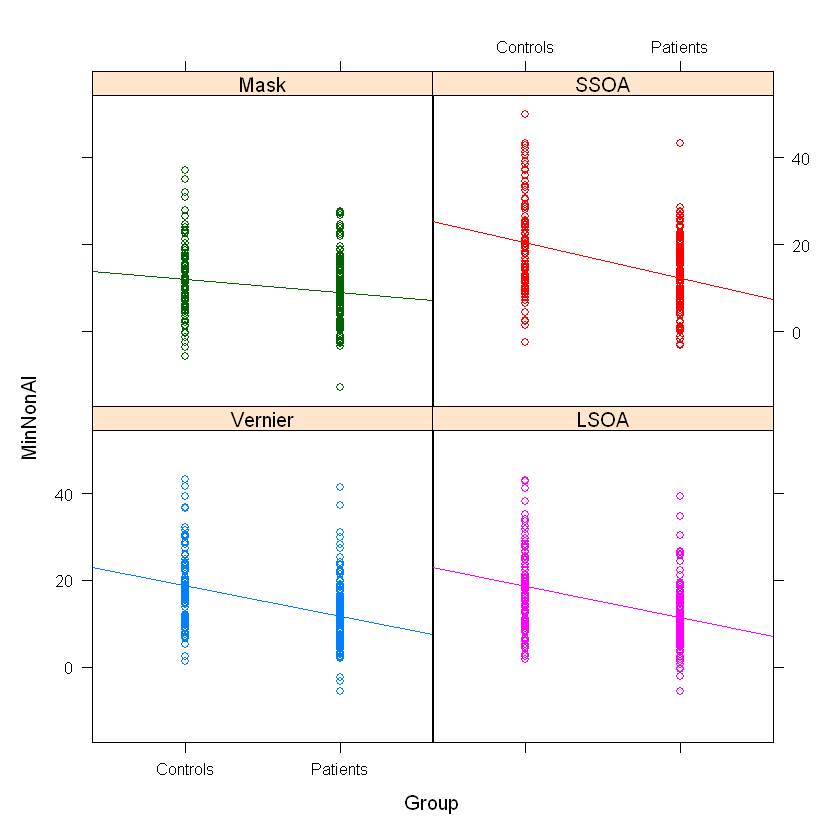

In [26]:
cat("explained variance amplitude model")
expvaramp <- round(r.squaredGLMM(lmm_amp), 2)
expvaramp <- as.data.frame(expvaramp)
expvaramp
icc(lmm_amp)

cat("explained variance aligned amplitude model")
expvarampal <- round(r.squaredGLMM(lmm_amp_aligned), 2)
expvarampal <- as.data.frame(expvarampal)
expvarampal
icc(lmm_amp_aligned)


cat("explained varaince CV model")
expvarcv <- round(r.squaredGLMM(lmm_cv), 2)
expvarcv <- as.data.frame(expvarcv)
expvarcv
icc(lmm_cv)

lattice::xyplot(MinNonAl ~ Group|Condition, groups=Condition, data=results, type=c('p','r'), auto.key=F)